Assignment from https://cjtu.github.io/spirl/f21_a5.html

In [1]:
import numpy as np
import pandas as pd

In [2]:
# read stellar data from internet file
stellar_data = pd.read_csv('https://raw.githubusercontent.com/cjtu/spirl/'
                           'master/spirl/data/a5data.csv')

stellar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Seq         197 non-null    int64  
 1   RA_ICRS     197 non-null    float64
 2   DE_ICRS     197 non-null    float64
 3   Plx         197 non-null    float64
 4   e_Plx       197 non-null    float64
 5   pmRA        197 non-null    float64
 6   e_pmRA      197 non-null    float64
 7   pmDE        197 non-null    float64
 8   e_pmDE      197 non-null    float64
 9   RV          197 non-null    float64
 10  e_RV        197 non-null    float64
 11  Memb        197 non-null    object 
 12  GaiaDR2     197 non-null    object 
 13  SimbadName  197 non-null    object 
 14  _RA_icrs    197 non-null    float64
 15  _DE_icrs    197 non-null    float64
 16  Gmag        197 non-null    float64
 17  BPmag       197 non-null    float64
 18  RPmag       197 non-null    float64
dtypes: float64(15), int64(1), obj

$$\mu=m-M\Rightarrow M=m-\mu$$
Since
$$\begin{align*}
\mu &= 5\log_{10}\left(\frac{\mathrm{Dist_{parsec}}}{10\,\mathrm{parsec}}\right) \\
&= 5\,\left(\log_{10}\mathrm{Dist_{parsec}}-\log_{10}\mathrm{10}\,\mathrm{parsec}\right) \\ 
&= 5\,\left(\log_{10}\mathrm{Dist_{parsec}}-1\right) \\
&= 5\log_{10}\mathrm{Dist_{parsec}}-5
\end{align*}$$
along with $$\mathrm{Dist_{parsec}}=1000/\mathrm{parallax_{milliarcsecond}}$$
Therefore, we can derive the absolute magnitude as
$$M=m-5\log_{10}\left(\frac{1000}{\mathrm{parallax_{milliarcsecond}}}\right)+5$$

In [3]:
# compute distance
stellar_data['distance_from_parallax'] = 1000 / stellar_data['Plx']
# notice that np.log is the natural logarithm, not the 10-base logarithm
# use np.log10 for 10-base logarithm
stellar_data['distance_modulus'] = 5 * np.log10(stellar_data['distance_modulus']) + 5
# compute absolute mag M
stellar_data['absolute_magnitude'] = stellar_data['Gmag'] - stellar_data['distance_modulus']

# or in single step
# stellar_data['absolute_magnitude'] = stellar_data['Gmag'] - 5 * np.log10(
#     1000 / stellar_data['Plx']) + 5

# compute colour
stellar_data['colour'] = stellar_data['BPmag'] - stellar_data['RPmag']

In [4]:
white_dwarfs = stellar_data[(stellar_data['absolute_magnitude'] > 11) &
                            (stellar_data['colour'] < 2)]

giants = stellar_data[(stellar_data['absolute_magnitude'] < 1) &
                      (stellar_data['colour'] > .5)]

In [5]:
white_dwarfs.describe()

,Seq,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,RV,e_RV,_RA_icrs,_DE_icrs,Gmag,BPmag,RPmag,distance_modulus,absolute_magnitude,colour
count,1.0,1.00000,1.00000,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.0,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
mean,11.0,184.73402,25.76584,11.54,0.1,-11.62,0.16,-9.61,0.18,0.0,0.0,184.73409,25.765882,16.611988,16.565842,16.71564,86.655113,11.923017,-0.149798
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11.0,184.73402,25.76584,11.54,0.1,-11.62,0.16,-9.61,0.18,0.0,0.0,184.73409,25.765882,16.611988,16.565842,16.71564,86.655113,11.923017,-0.149798
25%,11.0,184.73402,25.76584,11.54,0.1,-11.62,0.16,-9.61,0.18,0.0,0.0,184.73409,25.765882,16.611988,16.565842,16.71564,86.655113,11.923017,-0.149798
50%,11.0,184.73402,25.76584,11.54,0.1,-11.62,0.16,-9.61,0.18,0.0,0.0,184.73409,25.765882,16.611988,16.565842,16.71564,86.655113,11.923017,-0.149798
75%,11.0,184.73402,25.76584,11.54,0.1,-11.62,0.16,-9.61,0.18,0.0,0.0,184.73409,25.765882,16.611988,16.565842,16.71564,86.655113,11.923017,-0.149798
max,11.0,184.73402,25.76584,11.54,0.1,-11.62,0.16,-9.61,0.18,0.0,0.0,184.73409,25.765882,16.611988,16.565842,16.71564,86.655113,11.923017,-0.149798


In [6]:
import matplotlib.pyplot as plt

from matplotlib.ticker import AutoMinorLocator

[Text(0.5, 1.5, 'giants'), Text(0.5, 1.5, 'giants')]

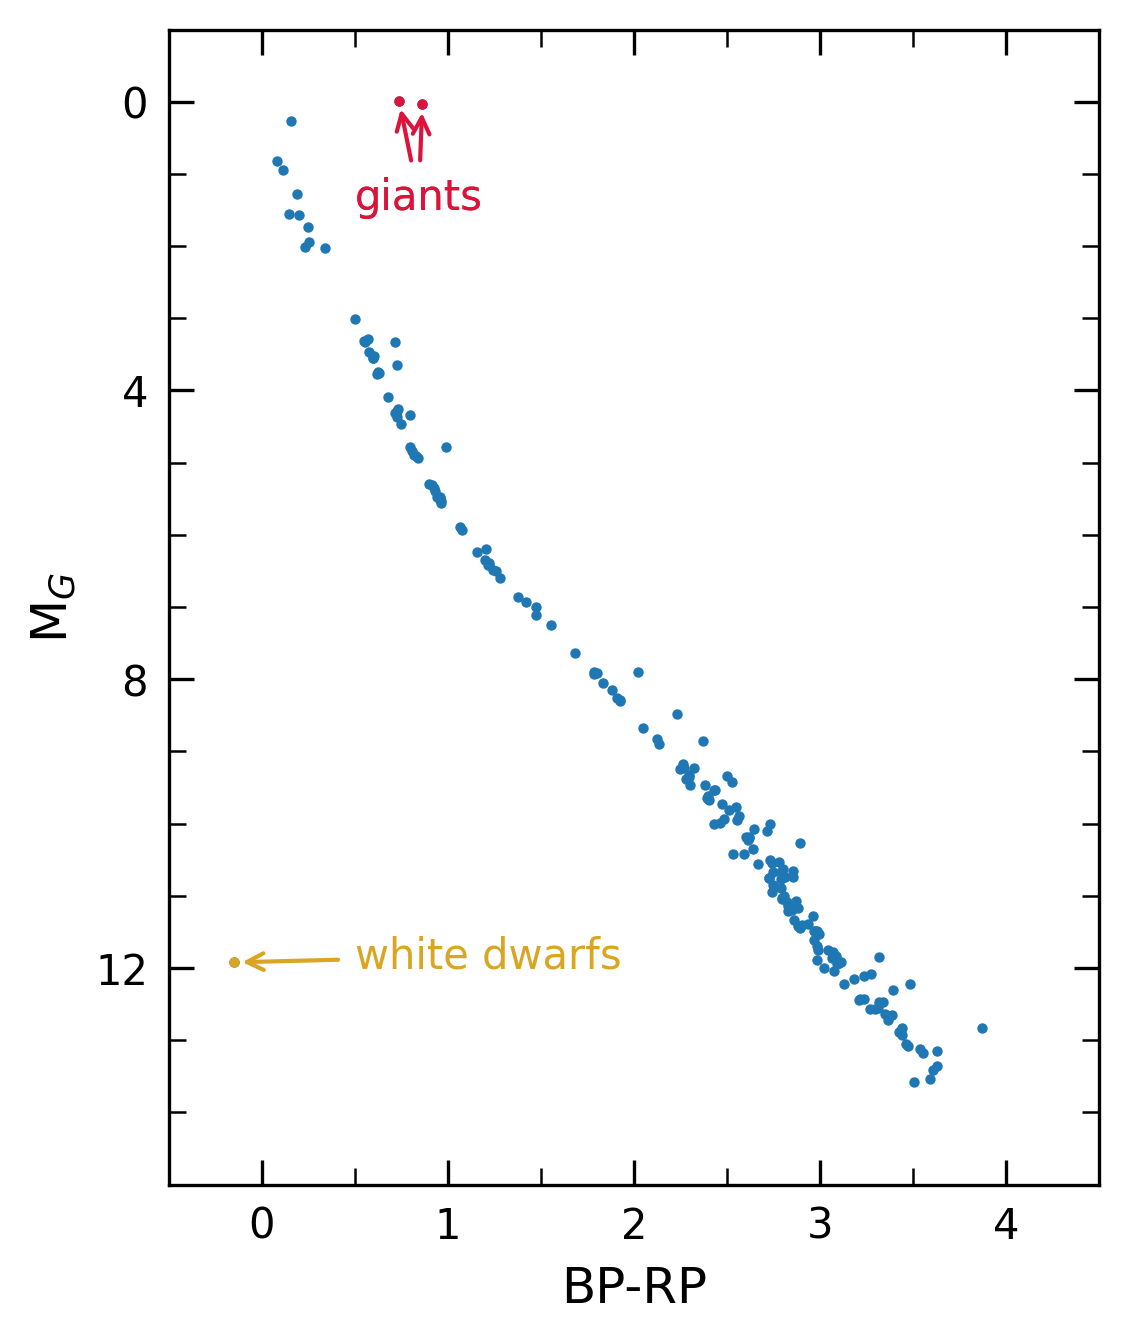

In [7]:
fig, axis = plt.subplots(1, 1, figsize=(4, 5), facecolor='white',
                         dpi=300, gridspec_kw={'hspace': 0.25, 'wspace': 0})

# NOT really convenient from my view...
# matplotlib modules do more plotting tricks than dull DataFrame.plot()
stellar_data.plot(ax=axis, legend=False,
                  x='colour', y='absolute_magnitude',
                  xlabel='BP-RP', ylabel='$\mathrm{M}_G$',
                  c='tab:blue', marker='.', ms=5, mew=0, ls='')
# or set the axis label via axis.set_xlabel / axis.set_ylabel
# axis.set_xlabel('BP-RP', fontdict=...)
white_dwarfs.plot(ax=axis, legend=False,
                  x='colour', y='absolute_magnitude',
                  xlabel='BP-RP', ylabel='$\mathrm{M}_G$',
                  c='goldenrod', marker='.', ms=5, mew=0, ls='')
giants.plot(ax=axis, legend=False,
            x='colour', y='absolute_magnitude',
            xlabel='BP-RP', ylabel='$\mathrm{M}_G$',
            c='crimson', marker='.', ms=5, mew=0, ls='')

# set axis attributes
axis.set_xlim(-.5, 4.5)
axis.set_ylim(-1, 15)
axis.invert_yaxis()
# or set the inverted range
axis.set_ylim(15, -1)

axis.tick_params(axis='both', right=True, top=True, pad=5,
                 direction='in', length=6, which='major')
axis.tick_params(axis='both', right=True, top=True, pad=5,
                 direction='in', length=4, which='minor')

axis.set_xlabel(axis.get_xlabel(),
                size='large', style='normal', family='sans-serif')
axis.set_ylabel(axis.get_ylabel(),
                size='large', style='normal', family='sans-serif')

axis.xaxis.set_minor_locator(AutoMinorLocator(2))
axis.yaxis.set_major_locator(plt.MultipleLocator(4))
axis.yaxis.set_minor_locator(AutoMinorLocator(4))

[axis.annotate(text='white dwarfs', c='goldenrod',
               xy=coord, xytext=(.5, 12),
               arrowprops={'arrowstyle': '->', 'color': 'goldenrod'})
 for coord in [(white_dwarfs['colour'][idx], white_dwarfs['absolute_magnitude'][idx])
               for idx in white_dwarfs.index]]

[axis.annotate(text='giants', c='crimson',
               xy=coord, xytext=(.5, 1.5),
               arrowprops={'arrowstyle': '->', 'color': 'crimson'})
 for coord in [(giants['colour'][idx], giants['absolute_magnitude'][idx])
               for idx in giants.index]]

In [8]:
# change the export directories and file names accordingly
# please make sure that the export directories do EXIST
# otherwise the export will fail, as presented below
giants.to_csv('/path/to/giant.csv', index=False)

OSError: Cannot save file into a non-existent directory: '/path/to'